1. What is the core assumption of Naive Bayes?
The core assumption of Naive Bayes is that all features (predictors) are conditionally independent of each other given the class label. This "naive" assumption simplifies the computation of probabilities, making the algorithm efficient despite its simplicity.

2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.

GaussianNB assumes features follow a normal (Gaussian) distribution and is used for continuous data.

MultinomialNB is suitable for discrete count data, like word frequencies in text classification.

BernoulliNB is designed for binary/boolean features and works well for data where features are either present or absent (0 or 1).

3. Why is Naive Bayes considered suitable for high-dimensional data?
Naive Bayes is efficient for high-dimensional data because it models each feature independently, reducing computational complexity. This makes it scalable and fast, particularly useful in applications like text classification with thousands of features (e.g., words in documents).



In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 2: Load Dataset (SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Step 3: Encode Labels (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Preprocess with CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 9: Display Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9856502242152466
Precision: 0.9403973509933775
Recall: 0.9530201342281879
Confusion Matrix:
 [[957   9]
 [  7 142]]


In [3]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Dataset (Iris or Wine)
data = load_iris()  # use load_wine() for wine dataset
X = data.data
y = data.target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Models
gnb = GaussianNB()
lr = LogisticRegression(max_iter=200)
dt = DecisionTreeClassifier()

gnb.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Step 5: Predictions
gnb_pred = gnb.predict(X_test)
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

# Step 6: Evaluation
print("=== GaussianNB ===")
print("Accuracy:", accuracy_score(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


=== GaussianNB ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== Logistic Regression ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1      

1. What is entropy and information gain?

Entropy measures the impurity or uncertainty in a dataset — higher entropy means more disorder.

Information Gain is the reduction in entropy after a dataset is split on a feature. It helps determine which feature to split on by maximizing the gain.

2. Explain the difference between Gini Index and Entropy.

Both are impurity measures used to build decision trees.

Gini Index calculates the probability of misclassifying a randomly chosen element and is generally faster.

Entropy uses logarithms and tends to be more informative but computationally heavier. Both usually yield similar splits.

3. How can a decision tree overfit? How can this be avoided?

A decision tree can overfit by growing too deep and capturing noise or minor fluctuations in the training data.

To avoid overfitting, use techniques like pruning, setting a maximum depth, minimum samples per leaf, or use ensemble methods like Random Forests.

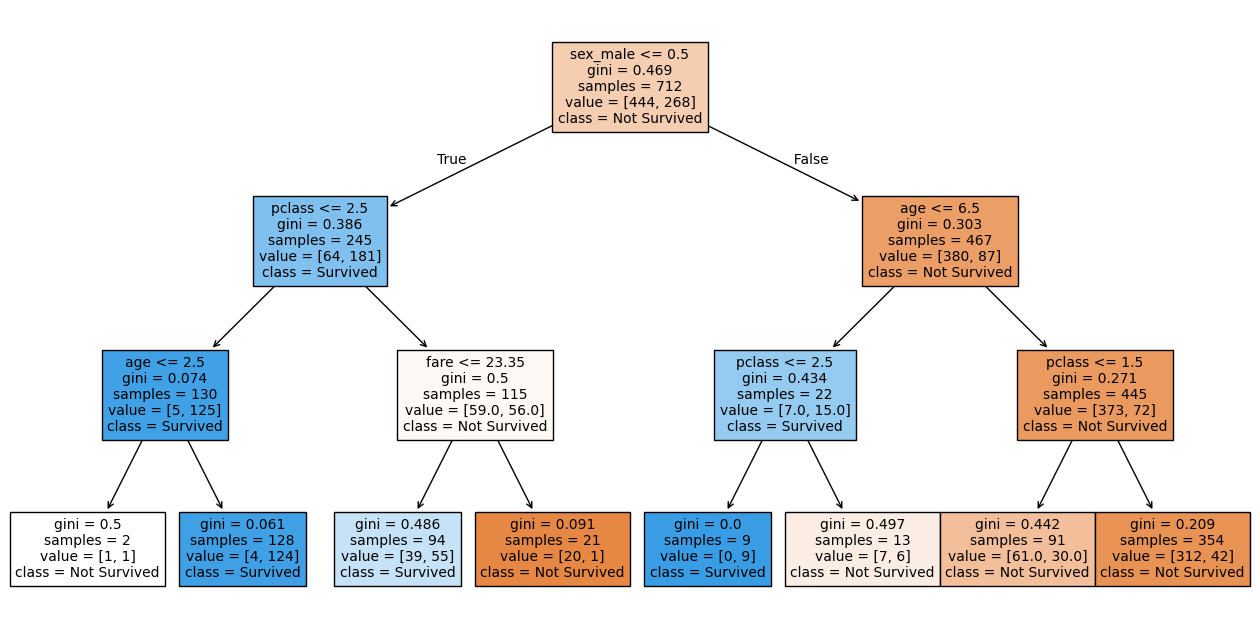

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[92 13]
 [23 51]]


In [4]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (from seaborn or CSV)
import seaborn as sns
df = sns.load_dataset('titanic')  # Alternatively use pd.read_csv('titanic.csv')

# Step 3: Preprocess data
# Drop rows with missing target
df = df.dropna(subset=['survived'])

# Select relevant features
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
df = df[features + ['survived']]

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Step 4: Split data
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Step 7: Evaluate the model
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)


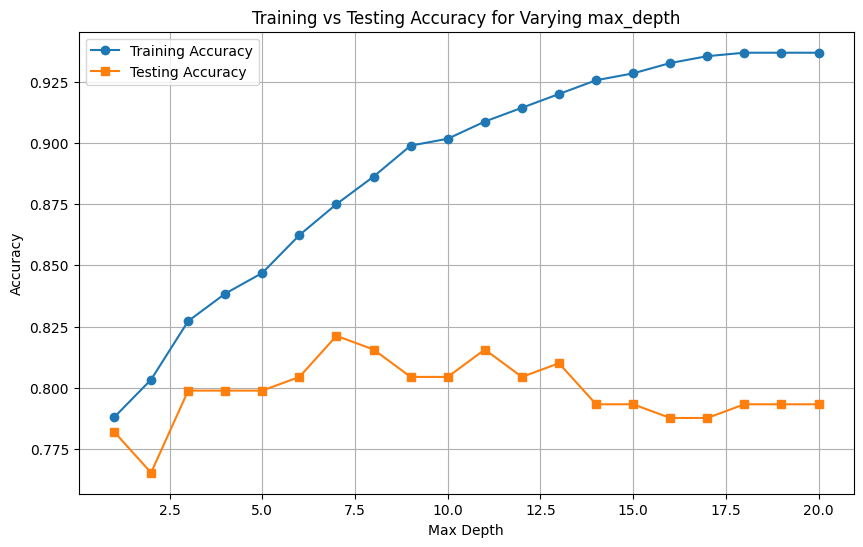

In [5]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load and preprocess Titanic dataset
df = sns.load_dataset('titanic')
df = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].dropna(subset=['survived'])

df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Try multiple values of max_depth and min_samples_split
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, min_samples_split=5, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Step 4: Plot Training vs Testing Accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Varying max_depth')
plt.legend()
plt.grid(True)
plt.show()


1. What is the difference between Bagging and Boosting?
Bagging (Bootstrap Aggregating) trains multiple models independently on random subsets of the data (with replacement) and then averages or votes the predictions to reduce variance.

Boosting trains models sequentially, where each new model focuses on correcting the errors of the previous one, improving bias and building a strong learner from weak ones.

2. How does Random Forest reduce variance?
Random Forest reduces variance by averaging the predictions of many decision trees, each trained on a different bootstrap sample and using random subsets of features. This randomness ensures the individual trees are less correlated, which stabilizes and generalizes the final output.

3. What is the weakness of boosting-based methods?
Boosting methods can overfit noisy data or outliers because they place increasing emphasis on difficult or misclassified samples. They are also typically slower to train due to their sequential nature, and may be more sensitive to hyperparameters compared to bagging.



In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# Step 2: Load and preprocess Titanic dataset
df = sns.load_dataset('titanic')
df = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].dropna(subset=['survived'])

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Prepare features and target
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [8]:
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))


=== Decision Tree ===
Accuracy: 0.7988826815642458
Precision: 0.8275862068965517
Recall: 0.6486486486486487

=== Random Forest ===
Accuracy: 0.8156424581005587
Precision: 0.8360655737704918
Recall: 0.6891891891891891


C:\Users\Asus\AppData\Local\Temp\ipykernel_10580\2166928396.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


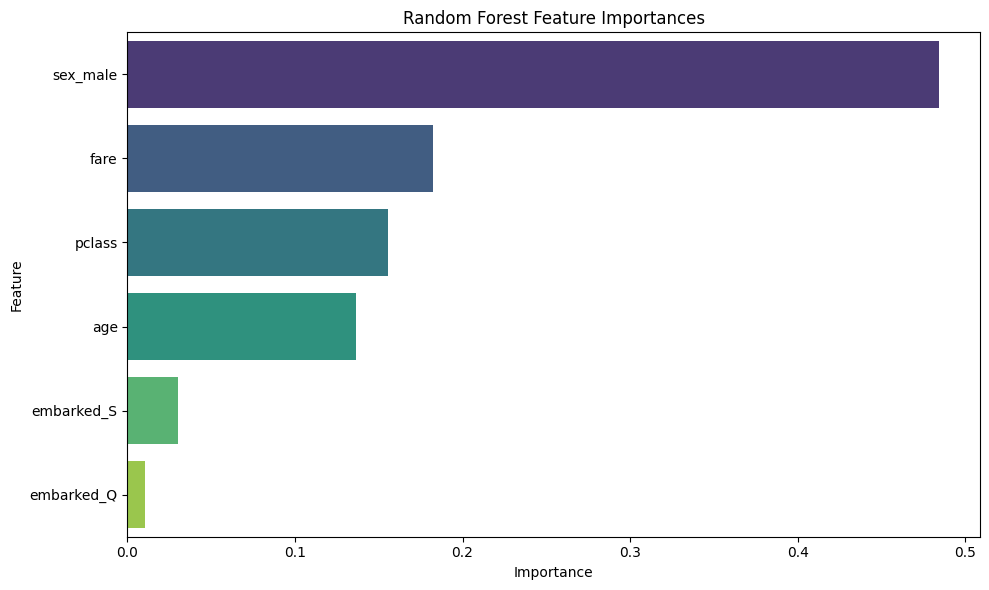

In [9]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()
